<a href="https://colab.research.google.com/github/sahithyamitra/Car-price-analysis/blob/master/Exploratory_data_analysis_of_car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explanatory data analysis of car features**

> In this project we will be looking how to analyze and visualize the car dataset
and apply machine learning models.we will also plot different graphs such as bar graph,scatter plot,line graph to obtain the relationship between different features.finally,we predict the price of the car by splitting the datasets into training and test dataset.this datasets are fed into the model,where the model is made to learn how to predict the prices or cost based on features.To check if the model is giving correct predictions,we use rmse,r2,mae to check the efficiency of the model



**Step-1**

> importing datasets,statistical summary


In [ ]:
#import libraries and dataset
#numpy is used for mathematical calculations
#pandas is for machine learning models
#matplotlib can be used to plot the graphs and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [ ]:
#to import the dataset from local to colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
#head() is used to print the top 5 rows
#tail() is used to print the bottom 5 rows
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#data is converted to dataframe
pd.DataFrame(data.head(10))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
#for chceking datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

From the above result,we can observe that there are 15 columns out of which 5 columns are of int64 type,3 columns are of float64 type and the rest holds object or string variables.It can be scaled or we can just use the numerical columns for prediction

In [ ]:
#statistical summary
#describe() is used to give statistical summary like mean,min,max
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
#shape
data.shape

(11914, 16)

In [ ]:
#null values
#it is used to count the number of null values in the dataset
data.isnull().sum(axis=0)

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**Step**-**2**

>Drop the columns



In [ ]:
#deleting the columns
#in this we check which column has more number of null values
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
#as we can see in the above result market category has most null values,hence it can be removed,engine cylinders
#vehicle size,popularity,vehicle style and number of doors is also removed because the value  does not play an important role in prediction
data.drop(['Vehicle Style', 'Popularity','Vehicle Size','Market Category','Number of Doors'],axis=1,inplace=True)

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**Step**-**3**

> Renaming the columns



In [ ]:
#rename the columns
data=data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**Step-4**

> Removing the duplicated rows and identifying if any null rows are present and removing it 



In [ ]:
#check if any duplicated row is present
data.duplicated().sum()

918

In [ ]:
#drop the duplicated rows 
#inplace argument is made true so that the dropped rows has to reflected or changed in the dataset as well
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
#check if any null value is present in rows
#any() returns boolean values
data.isnull().any()

Make                False
Model               False
Year                False
Engine Fuel Type     True
HP                   True
Cylinders            True
Transmission        False
Drive Mode          False
MPG-H               False
MPG-C               False
Price               False
dtype: bool

In [ ]:
#drop the rows with null values
data.dropna(inplace=True)
data.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
MPG-H               0
MPG-C               0
Price               0
dtype: int64

**Step-5**

> Checking for outliers

*   outliers are those values which deviate the model or which is out of the range from other values


*   These outliers has to be removed to get efficient model outcomes




{'boxes': [<matplotlib.lines.Line2D at 0x7f1357dcb278>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1357dcbc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1357dde748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1357dde3c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1357dcb588>,
  <matplotlib.lines.Line2D at 0x7f1357dcb908>]}

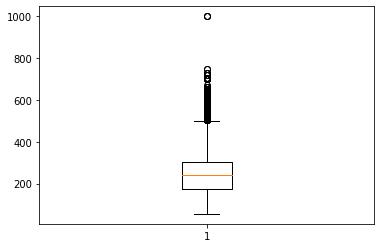

In [ ]:
#boxplot is plotted on the engine hp column to check if there is any presence of outliers
plt.boxplot(data['HP'])

we can see that there is presence of outlier greater than 800 and it needs to be removed

In [ ]:
#Get relevant percentiles and see their distribution
data['HP'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      55.0
0.1     138.0
0.2     165.0
0.3     185.0
0.4     204.0
0.5     240.0
0.6     272.0
0.7     292.0
0.8     325.0
0.9     395.0
1.0    1001.0
Name: HP, dtype: float64



*   that is with respect to engine hp,now lets see the outliers with respect to msrp 



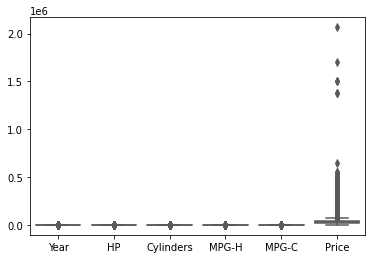

In [ ]:
#in the previous result we used matplotlib to plot but in this we will be using seaborn 
sns.boxplot(data=data,orient='v',palette='Set2')



*   The above graph gives an insight about the presence of outliers in all numerical rows
*   Price column has too many outliers,it can either be removed or scaling can be done



In [ ]:
#using log1p method in numpy,we can convert aall the values in the price column to logarithm values
data['new_price'] = np.log1p(data.Price)
data.drop('Price', axis=1, inplace=True)

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,new_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,26,19,10.739349
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,19,10.612779
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,28,20,10.500977
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,10.290483
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,28,18,10.448744




*   we can check out in the above result that after using log,the values are in the same range.which are not too long or short



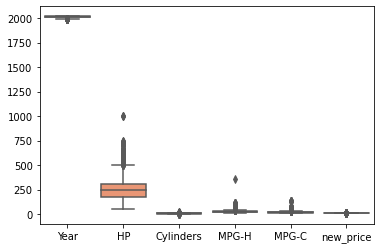

In [ ]:
#boxplot is used to check for outliers in other columns after removinf outliers in price column
sns.boxplot(data=data,orient='v',palette='Set2')

**Step-6**


> Car brands represented and average price among the top brand cars



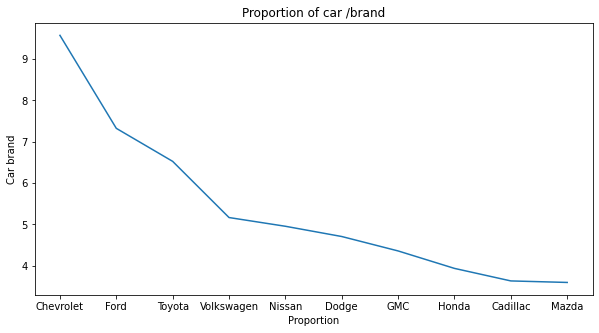

In [ ]:
# count of car per brand
#value_counts()-counts the number of cars of particular brand in 'make' column
car_brand = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# 9 most present labels
car_labels = car_brand.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.plot(car_labels,car_brand[:10])
plt.title('Proportion of car /brand')
plt.xlabel('Proportion')
plt.ylabel('Car brand')
plt.show()

From the above graph,we can say that chevrolet is the most represented car

In [ ]:
print("Over",len(car_brand),"different car brands, the 10 most recurrent car brands in that dataset\nrepresents",sum(car_brand[:10]),"% of the total number of cars !")

Over 47 different car brands, the 10 most recurrent car brands in that dataset
represents 53.78614043139054 % of the total number of cars !


average_pricing

In [ ]:
#average_price is calculated for each type of car
average_price = data[['Make','new_price']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(average_price)

            new_price
Make                 
Chevrolet   10.046432
Dodge        9.759691
Ford         9.997791
GMC         10.192228
Honda       10.082793
Mazda        9.655494
Nissan      10.020976
Toyota      10.056598
Volkswagen  10.176019


step-7

> correlation:It is the relationship between the two features and how it is related to each other



In [ ]:
#correlation
corrmatrix=data.corr()
corrmatrix

,Year,HP,Cylinders,MPG-H,MPG-C,new_price
Year,1.000000,0.318045,-0.044481,0.277294,0.228821,0.717313
HP,0.318045,1.000000,0.789931,-0.425387,-0.477244,0.684361
Cylinders,-0.044481,0.789931,1.000000,-0.615164,-0.634937,0.405870
MPG-H,0.277294,-0.425387,-0.615164,1.000000,0.842169,-0.077387
MPG-C,0.228821,-0.477244,-0.634937,0.842169,1.000000,-0.121696
new_price,0.717313,0.684361,0.405870,-0.077387,-0.121696,1.000000


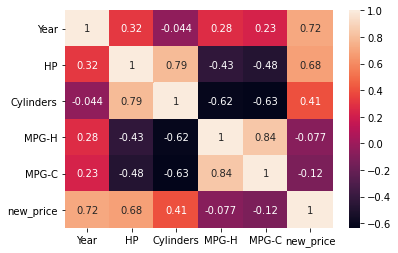

In [ ]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True)
plt.show()




*   From the above heat map, we can make conclusions that HP and Cylinders is highly correlated
*   Cylinders and MPG-C is least correlated or anti-correaltion



**Step-8**

> EDA and plot different plots to find variation of price with variables





In [ ]:
#EDA
data.shape
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders',
       'Transmission', 'Drive Mode', 'MPG-H', 'MPG-C', 'new_price'],
      dtype='object')

In [ ]:
data.nunique(axis=0)

Make                  47
Model                904
Year                  28
Engine Fuel Type       9
HP                   355
Cylinders              9
Transmission           5
Drive Mode             4
MPG-H                 44
MPG-C                 50
new_price           6013
dtype: int64

To plot the graphs of price with other features

<function matplotlib.pyplot.show>

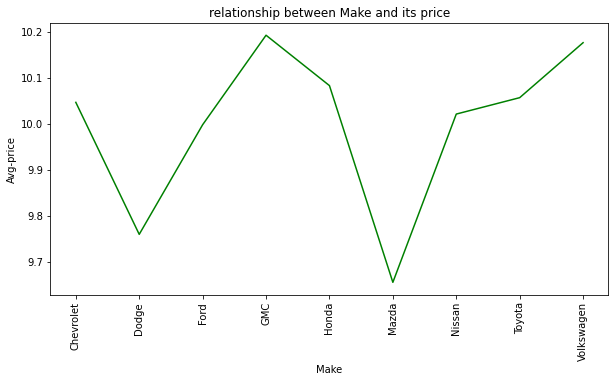

In [ ]:
#lets analyze how the price varies with different cars
plt.figure(figsize=(10,5))
plt.plot(average_price,color='green')
plt.xlabel('Make')
plt.ylabel('Avg-price')
plt.title('relationship between Make and its price')
plt.xticks(rotation=90)
plt.show



*   From the above graph,we can make insight that GMC has more average price 




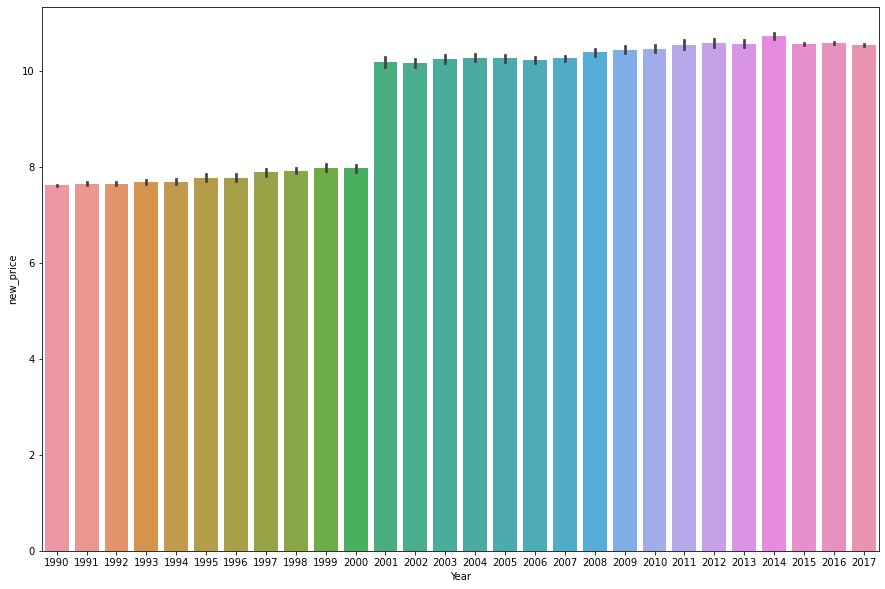

In [ ]:
#realtionship between year and price
plt.figure(figsize=(15,10))
sns.barplot(data['Year'],data['new_price'])



1.   The cost of cars are increased in the year 2000
2.   cost of cars is maximum in the yaer 2014



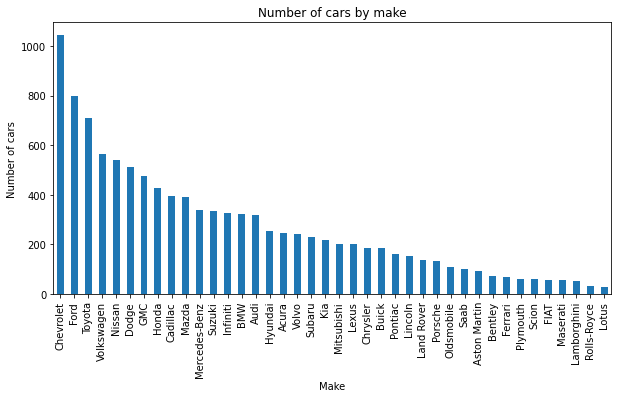

In [ ]:
#realtionship between make and the number of cars of particular brand
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');



1.  From above graph,Chevrolet car brand produces or makes maximum number of cars
2.  Lotus brand produces least number of cars



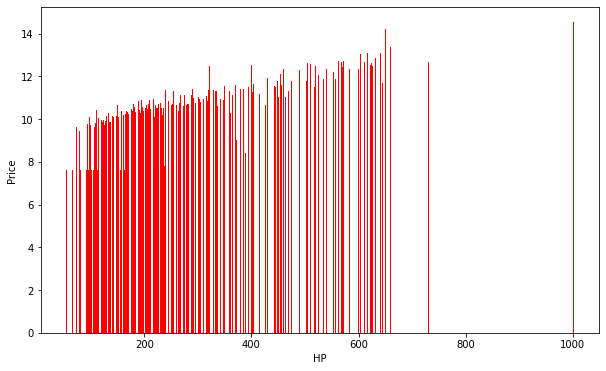

In [ ]:
#relationship between engine hp and cost
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data['HP'], data['new_price'],color='r')
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()



1.   We can see that price is proprtional to hp
2.   less the hp less the cost



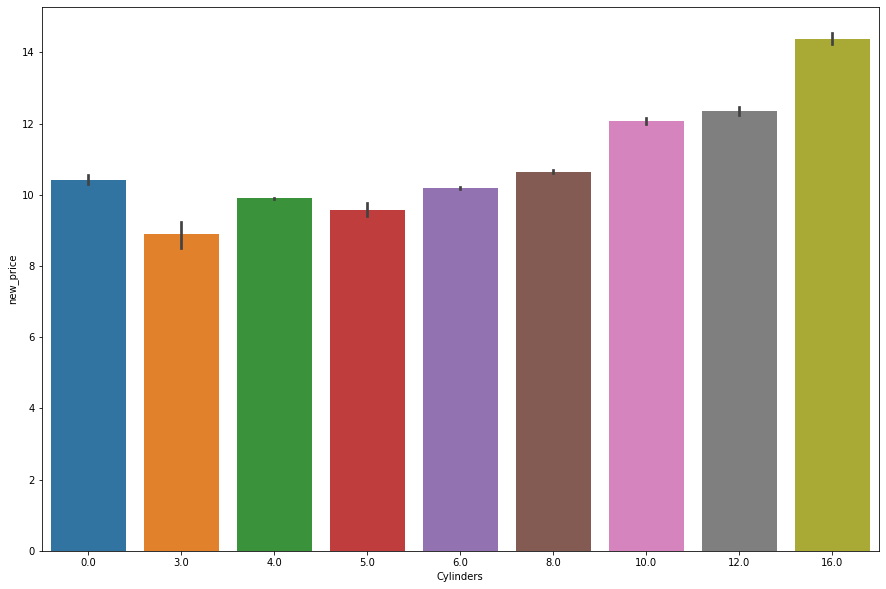

In [ ]:
#realtionship between cylinders and price
plt.figure(figsize=(15,10))
sns.barplot(data['Cylinders'],data['new_price'])



1.   In the above graph the cost increases as number of cylinders increases except for the few outliers



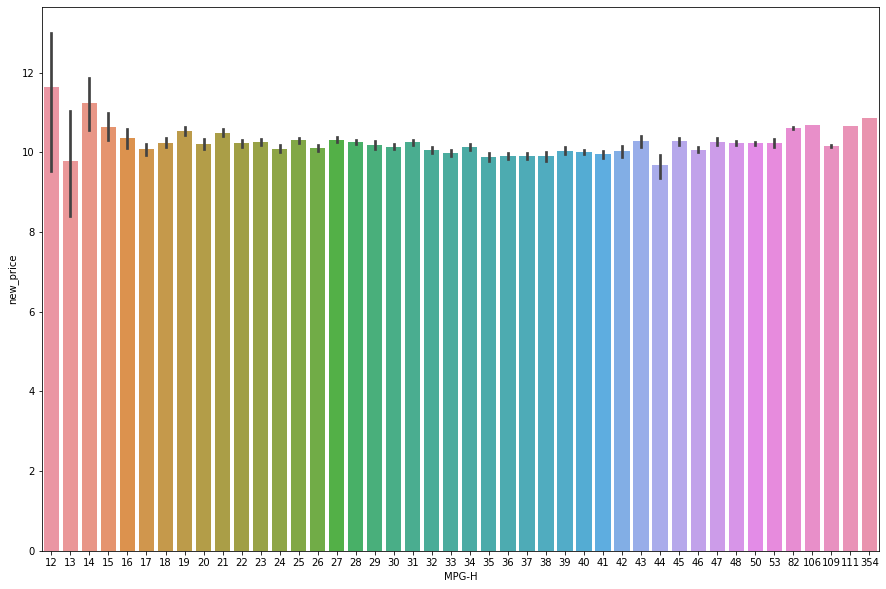

In [ ]:
#relationship between MPG-H and price
plt.figure(figsize=(15,10))
sns.barplot(data['MPG-H'],data['new_price'])

price is more for MPG-H 12 

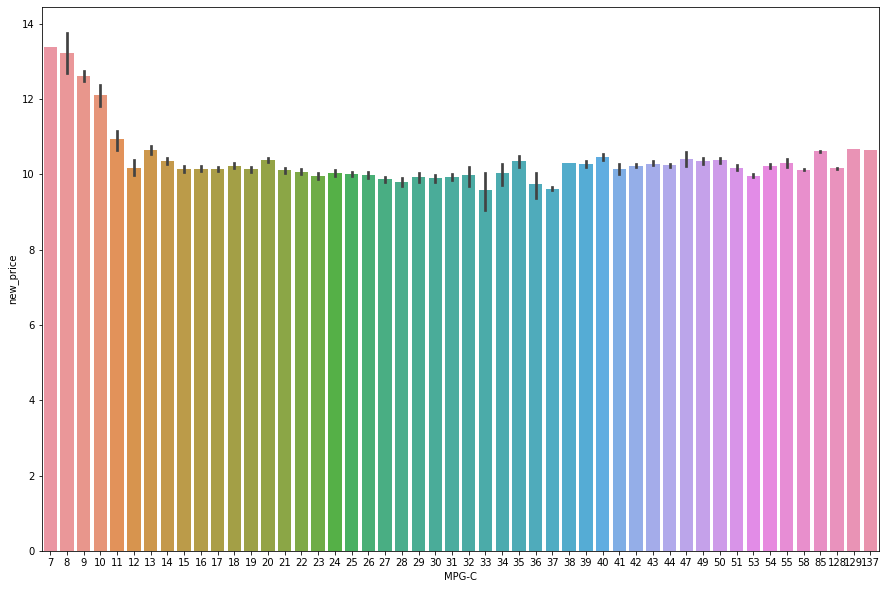

In [ ]:
#relationship between MPG-C and price
plt.figure(figsize=(15,10))
sns.barplot(data['MPG-C'],data['new_price'])

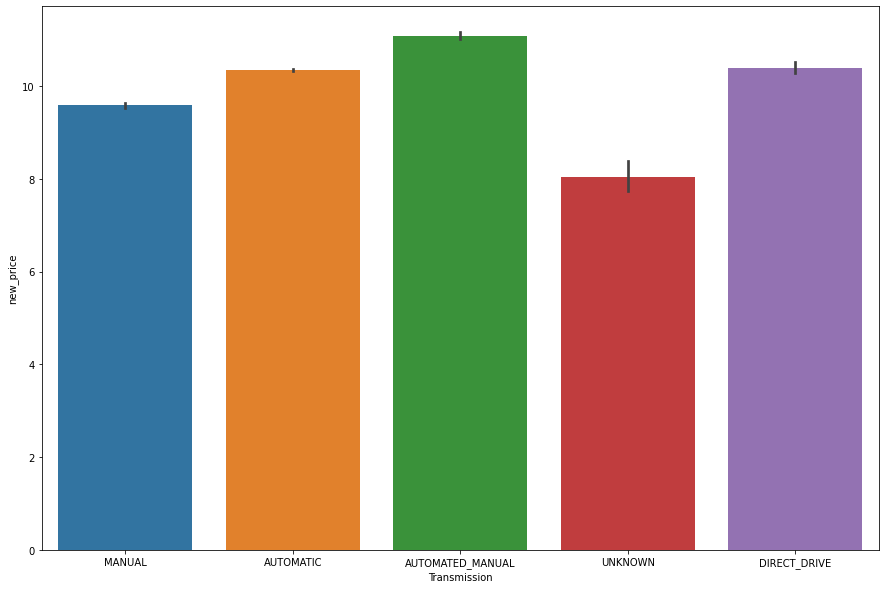

In [ ]:
#relationship between transmission and price
plt.figure(figsize=(15,10))
sns.barplot(data['Transmission'],data['new_price'])

Cost is more for automated_manual transmission

**Step-9**

> Split the dataset 

*   The model we have used for price prediction is linear regression
*   It is a basic one but gives all a basic idea how to go about the machine learning model





In [ ]:
#model building-importing libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#we are selecting only those columns that contain numerical values by getting rid of categorical values
numerical_col = ['new_price','HP','Year','Cylinders']
num_data = data[numerical_col]
New_data = data.copy()
num_data.head()

,new_price,HP,Year,Cylinders
0,10.739349,335.0,2011,6.0
1,10.612779,300.0,2011,6.0
2,10.500977,300.0,2011,6.0
3,10.290483,230.0,2011,6.0
4,10.448744,230.0,2011,6.0


In [ ]:
#selecting x and y values
#x is data containing features
#y contains the target variable
data=num_data
target = "new_price"
x = data[data.columns.difference([target])]
y = data['new_price']
print(x.shape)
y.shape

(10895, 3)


(10895,)

In [ ]:
#the model is splitted into two sets-train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#model is scaled removing any presence of too large data which might bring up an error
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#linear fitting
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predicting the price of car
y_test_predict = linear.predict(x_test)
print(y_test_predict)
y_train_predict= linear.predict(x_train)
y_train_predict

[11.03273647  8.44640462 11.68539952 ... 10.04352569  9.45584978
 10.39998944]


array([10.04314132, 10.12116516, 10.99290443, ..., 11.33285295,
       10.14240307,  9.2825474 ])

In [ ]:
#it gives a difference between actual price and predicted price by model
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_predict})
df

,Actual,Predicted
332,10.725270,11.032736
981,7.601402,8.446405
2464,10.664200,11.685400
2737,10.013955,9.874471
10810,10.094149,9.995343
...,...,...
3474,10.203814,9.961453
11739,10.856997,10.959014
4959,9.997479,10.043526
5787,10.266428,9.455850


In [ ]:
#printing the mean squared error,r2 score and mean absolute error to check the efficiency of the linear model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("mean squared error",mean_squared_error(y_train,y_train_predict))
print("mean squared error",mean_squared_error(y_test,y_test_predict))

print("R_score",r2_score(y_train,y_train_predict))
print("R_score",r2_score(y_test,y_test_predict))

print("mean absolute error",mean_absolute_error(y_train,y_train_predict))
print("mean absolute error",mean_absolute_error(y_test,y_test_predict))

mean squared error 0.26364743919025263
mean squared error 0.2796645559680262
R_score 0.7484443481539564
R_score 0.7519673443737401
mean absolute error 0.38709808008747376
mean absolute error 0.4020590556975263


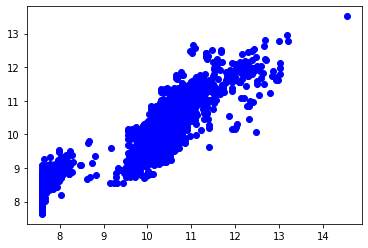

In [ ]:
 plt.scatter(y_test,y_test_predict,color='b')
 plt.show()

**Step-10**

> Algorithms


algorithm-1

> prediction using random forest


1.   In this scenario,i have used hyperparameter tuning which splits one part of datasets into test data in each iteration,the test data changes in each iteration.The hyperparameter tuning is mainly used for cross validation.
2.   Making more efficient,and hence reduces the risk of overfitting.





In [ ]:
data=num_data
target = "new_price"
x = data[data.columns.difference([target])]
y = data['new_price']
print(x.shape)
y.shape

(10895, 3)


(10895,)

In [ ]:
#randomforestregressor object is created
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# We are using the random grid to search for best hyperparameters
# First we need to create the base model to tune
regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# searching across 100 different combinations, we use all available cores
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fitting the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#function is used to check the model performance,average error,accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
#the base model is defined with n_esitmators=10 which acts as train dataset
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Average Error: 0.1233 degrees.
Accuracy = 98.80%.


In [ ]:
#the best_random is selected to test the test dataset
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 0.1216 degrees.
Accuracy = 98.82%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.02%.


Hence by hyperparameter tuning we have checked that the accuracy of random forest model is 98.8%.

algorithm-2

> Decision tree regression algorithm builds a regression or classification tree by splitting the dataets into many subsets and at the same time thee tree is consructed with incrementally.The final tree has nodes and leaf ends of predicted prices and outcomes



In [ ]:
data=num_data
target = "new_price"
x = data[data.columns.difference([target])]
y = data['new_price']
print(x.shape)
y.shape

(10895, 3)


(10895,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8716, 3)
(2179, 3)
(8716,)
(2179,)


In [ ]:
#decision tree algorithm fitting
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(random_state=0)
reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# predicting a new value
y_pred1 = reg.predict(x_train) 
print(y_pred1)
y_pred2=reg.predict(x_test)
print(y_pred2)

[ 7.60140233  9.98361608 10.37194586 ... 10.04632294  9.69588404
 11.34928763]
[ 9.71794317  9.76150325 10.79917269 ... 10.70834602  7.60140233
  7.60140233]


In [ ]:
df_dt=pd.DataFrame({'Actual':y_test,'predicted':y_pred2})
df_dt

,Actual,predicted
11828,9.703572,9.717943
3845,9.893235,9.761503
7930,10.987849,10.799173
2811,7.601402,7.601402
10348,10.250652,10.215137
...,...,...
10204,10.193766,10.154113
5199,10.110949,10.382853
3255,11.003282,10.708346
11424,7.601402,7.601402


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R_score",r2_score(y_test,y_pred2))

Mean Absolute Error: 0.11691205174745724
Mean Squared Error: 0.030422083877761522
Root Mean Squared Error: 0.1744192761072053
R_score 0.9720285759343675


In [ ]:
# Performance metrics
errors = abs(y_pred2 - y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.12 degrees.
Accuracy: 98.87 %.


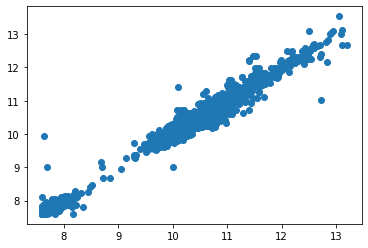

In [ ]:
plt.scatter(y_test,y_pred2)

algorithm-3

> polynomial regression:Polynomial Regression is a regression algorithm that models the relationship between a dependent and independent variable as nth degree polynomial



In [ ]:
#importing the libraries
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
y_poly_pred

array([10.84183872, 10.68092873, 10.68092873, ..., 10.693973  ,
       10.69432436, 10.02759814])

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse:",rmse)
print("r2:",r2)

rmse: 0.4029019197752551
r2: 0.8474287874050195
